# Present the symbolic derivation of existing models

In [1]:
%matplotlib widget
import os, importlib, inspect
from IPython.display import display, Math, Latex, Markdown
from bmcs_matmod.gsm_lagrange.gsm_def import GSMDef, sp
from bmcs_matmod.gsm_lagrange.gsm_model import GSMModel
import bmcs_matmod.time_function as tf
import numpy as np
import matplotlib.pyplot as plt
from bmcs_matmod.gsm_lagrange.gsm_def_registry import list_gsm_defs


In [ ]:
# Import the GSM definition registry  
from bmcs_matmod.gsm_lagrange.gsm_def_registry import get_gsm_defs

gsm_models = get_gsm_defs()

# Display available GSM definitions
print("Available GSM Definitions:")
for i, (key, gsm_def_class) in enumerate(gsm_models.items(), 1):
    if key.startswith('GSM1D_'):  # Show only full class names
        print(f"{i:2d}. {key} -> {gsm_def_class}")

gsm_defs = [(name, cls) for name, cls in gsm_models.items() if name.startswith('GSM1D_')]
print(f"\nTotal GSM definitions: {len(gsm_defs)}")

{'GSM1D_ED': <traits.has_traits.GSM1D_ED_Model at 0x7e99118ce070>,
 'GSM1D_EP': <traits.has_traits.GSM1D_EP_Model at 0x7e9911adaac0>,
 'GSM1D_EPD': <traits.has_traits.GSM1D_EPD_Model at 0x7e9911b1b830>,
 'GSM1D_EVP': <traits.has_traits.GSM1D_EVP_Model at 0x7e9911b1a6b0>,
 'GSM1D_EVPD': <traits.has_traits.GSM1D_EVPD_Model at 0x7e9911b126b0>,
 'GSM1D_VE': <traits.has_traits.GSM1D_VE_Model at 0x7e9911b10630>,
 'GSM1D_VED': <traits.has_traits.GSM1D_VED_Model at 0x7e9911b1dfd0>,
 'GSM1D_VEVP': <traits.has_traits.GSM1D_VEVP_Model at 0x7e9911b1de40>,
 'GSM1D_VEVPD': <traits.has_traits.GSM1D_VEVPD_Model at 0x7e9911aafb50>}

In [14]:
get_eps_t2 = tf.TimeFnCycleWithRamps()


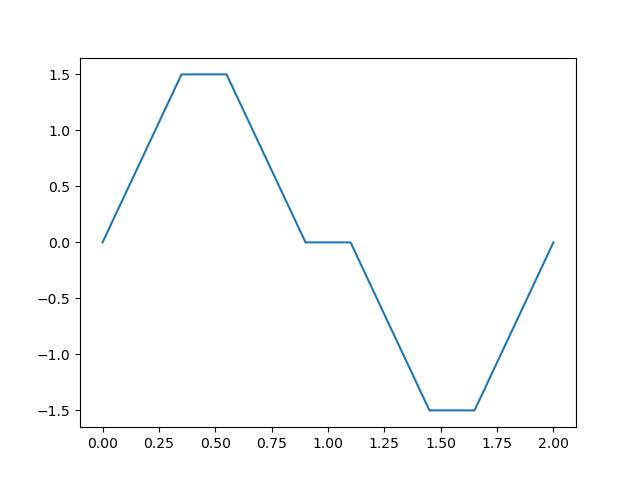

In [15]:
final_time, eps_max = 2, 1.5
t_t = np.linspace(0, final_time, 2000)
sig_n_t = eps_max * get_eps_t2(t_t / final_time)
fig, ax = plt.subplots(1,1)
ax.plot(t_t, sig_n_t)

In [ ]:
from bmcs_matmod.gsm_lagrange.gsm_def_registry import get_gsm_defs

gsm_model = GSMModel(gsm_defa['EVPD']
)

In [10]:
#mparams = dict(E = 20, K = 20, S = 10, c = 1, r = 1, eps_0 = 0, f_c = 15, eta_vp=50, eta_ve=50)
mparams = dict(E = 20, K = 20, S = 200, c = 1, r = 1, eps_0 = 0.7, f_c = 15, eta_vp=1, eta_ve=10)

response = {}
selection = [] # ['GSM1D_VEVP', 'GSM1D_VEVPD']
if len(selection) == 0:
    selection = gsm_models.keys()
for name in selection:
    gsm = gsm_models[name]
    gsm.set_params(**mparams)
    print(f'name: {name}')
    response[name] = gsm.get_F_response(sig_n_t, t_t)


name: GSM1D_ED


<lambdifygenerated-2>:11: RuntimeWarning: divide by zero encountered in reciprocal
  x7 = x1**(-1.0)
<lambdifygenerated-2>:15: RuntimeWarning: invalid value encountered in multiply
  x11 = 2*S*x10*x6*x7*x9
<lambdifygenerated-2>:17: RuntimeWarning: invalid value encountered in multiply
  return (array([[x2], [x3]]), x4, array([[2*S*Deltalambda_mathrmphi*x10*x6*x7*x9 - Deltaomega*x5], [-Deltalambda_mathrmphi + Deltaz*x5], [x4]]), array([[-c*Deltalambda_mathrmphi*x11/x8 - x5, O, x11], [O, I*x5, x12], [O, x12, O]]))


name: GSM1D_EP
name: GSM1D_EPD
name: GSM1D_EPD
name: GSM1D_EVP
name: GSM1D_EVP
name: GSM1D_EVPD
name: GSM1D_EVPD
name: GSM1D_VE
name: GSM1D_VE
name: GSM1D_VED
name: GSM1D_VED
name: GSM1D_VEVP
name: GSM1D_VEVP
name: GSM1D_VEVPD
name: GSM1D_VEVPD


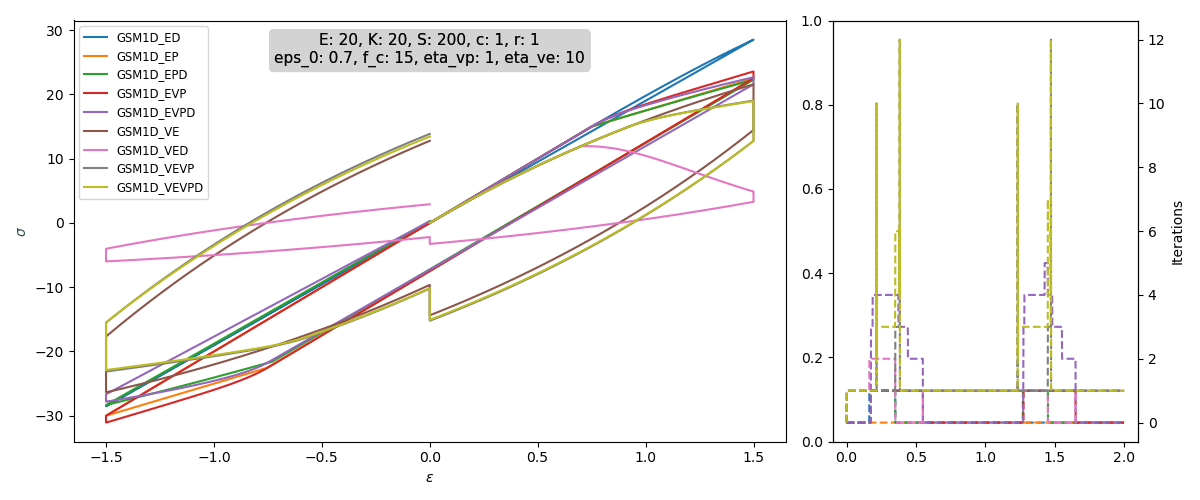

In [11]:
fig, (ax_sig, ax_eps) = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [7, 3]})
ax_iter = ax_eps.twinx()
ax_iter.set_ylabel('Iterations')
# ax_eps.plot(t_t, eps_n_t, color='black')
# ax_eps.set_xlabel(r'$t$')
# ax_eps.set_ylabel(r'$\varepsilon$')
for name, rd in response.items():
    eps_t = rd.eps_t[:, 0]
    iter_t = rd.iter_t[:, 0]
    sig_t = rd.sig_t[:, 0, 0]
    ax_sig.plot(eps_t, sig_t, label=rf'{name}')
    ax_iter.plot(t_t, iter_t, label=rf'{name}', linestyle='dashed')
    # Add a box with the material parameters
    param_text = ', '.join([f'{key}: {value}' for key, value in mparams.items()])
    param_text = '\n'.join([', '.join(param_text.split(', ')[i:i+5]) for i in range(0, len(param_text.split(', ')), 5)])
    props = dict(boxstyle='round', facecolor='lightgray', edgecolor='lightgray', alpha=0.5)
    ax_sig.text(0.5, 0.97, param_text, transform=ax_sig.transAxes, fontsize=11,
                verticalalignment='top', horizontalalignment='center', bbox=props)
ax_sig.set_ylabel(r'$\sigma$', color='darkslategray')
ax_sig.set_xlabel(r'$\varepsilon$')
ax_sig.legend(fontsize='small')
fig.tight_layout()

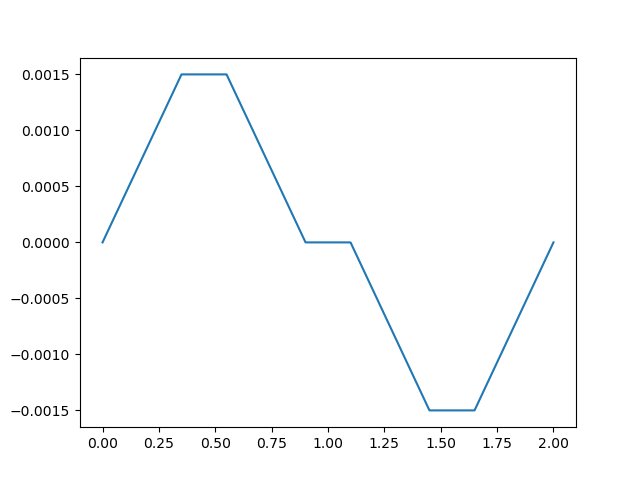

In [12]:
final_time, eps_max = 2, 1.5e-3
t_t = np.linspace(0, final_time, 2000)
sig_n_t = eps_max * get_eps_t2(t_t / final_time)
fig, ax = plt.subplots(1,1)
ax.plot(t_t, sig_n_t)

In [9]:
mparams = dict(E = 20e+6, K = 20e+6, S = 0.000005, c = 1, r = 1, eps_0 = 1.2e-3, f_c = 15e+3, eta_vp=1e+6, eta_ve=15e+6)

response = {}
selection = []
#selection = ['GSM1D_EP', 'GSM1D_EPD', 'GSM1D_EVP', 'GSM1D_EVPD']
selection = ['GSM1D_VE', 'GSM1D_VEVP', 'GSM1D_VEVPD']
if len(selection) == 0:
    selection = gsm_models.keys()
for name in selection:
    gsm = gsm_models[name]
    gsm.set_params(**mparams)
    print(f'name: {name}')
    response[name] = gsm.get_F_response(sig_n_t, t_t)


name: GSM1D_VE
name: GSM1D_VEVP
name: GSM1D_VEVPD


In [10]:
display_units = dict(
    E = (r'$\mathrm{GPa}$',1e-6),
    K = (r'$\mathrm{GPa}$',1e-6),
    S = (r'$\mathrm{GJ}^{-1}$',1e+6),
    c = (r'$-$',1),
    r = (r'$-$',1),
    eps_0 = (r'$\mathrm{mm/mm}$',1),
    f_c = (r'$\mathrm{MPa}$',1e-3),
    eta_vp=(r'$\mathrm{MPa \cdot s}$',1e-6),
    eta_ve=(r'$\mathrm{MPa \cdot s}$',1e-6)
)

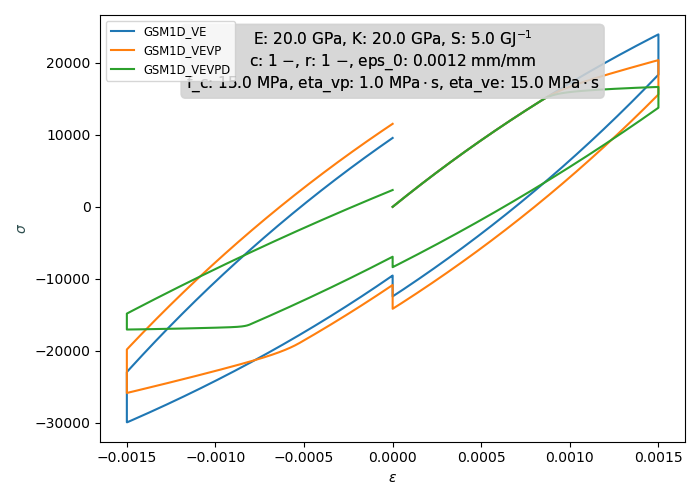

In [11]:
fig, ax_sig = plt.subplots(1, 1, figsize=(7, 5))
fig.canvas.header_visible = False
ax_iter = ax_eps.twinx()
ax_iter.set_ylabel('Iterations')
for name, rd in response.items():
    eps_t = rd.eps_t[:, 0]
    sig_t = rd.sig_t[:, 0, 0]
    ax_sig.plot(eps_t, sig_t, label=rf'{name}')
    # Add a box with the material parameters
    param_text = ', '.join([f'{key}: {value * display_units[key][1]} {display_units[key][0]}' for key, value in mparams.items()])
    param_text = '\n'.join([', '.join(param_text.split(', ')[i:i+3]) for i in range(0, len(param_text.split(', ')), 3)])
    props = dict(boxstyle='round', facecolor='lightgray', edgecolor='lightgray', alpha=0.5)
    ax_sig.text(0.5, 0.97, param_text, transform=ax_sig.transAxes, fontsize=11,
                verticalalignment='top', horizontalalignment='center', bbox=props)
ax_sig.set_ylabel(r'$\sigma$', color='darkslategray')
ax_sig.set_xlabel(r'$\varepsilon$')
ax_sig.legend(fontsize='small')
fig.tight_layout()

In [16]:
# mparams = dict(E = 20, K = 20, S = 1, c = 1, r = 1, eps_0 = 0, f_c = 15, 
#                eta_vp=500, eta_ve=500)
# mparams = dict(E = 20, K = 20, S = 10, c = 1, r = 1, eps_0 = 0, f_c = 15, eta_vp=1, eta_ve=10)

response = {}
selection = ['GSM1D_VEVP']
if len(selection) == 0:
    selection = gsm_models.keys()
for name in selection:
    gsm = gsm_models[name]
    gsm.set_params(**mparams)
    print(f'name: {name}')
    response[name] = gsm.get_F_response(sig_n_t, t_t)

name: GSM1D_VEVP


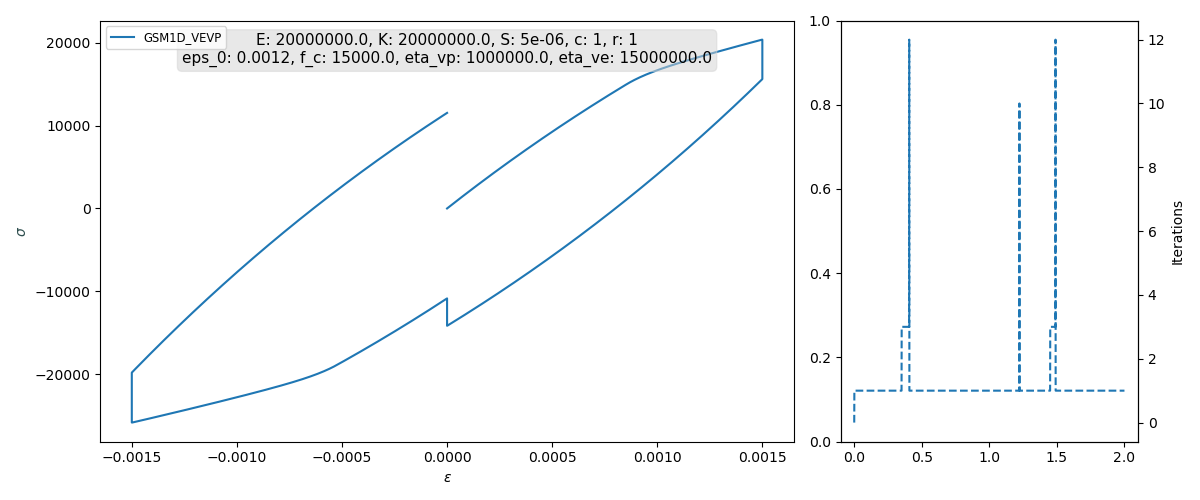

In [17]:
fig, (ax_sig, ax_eps) = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [7, 3]})
ax_iter = ax_eps.twinx()
ax_iter.set_ylabel('Iterations')
# ax_eps.plot(t_t, eps_n_t, color='black')
# ax_eps.set_xlabel(r'$t$')
# ax_eps.set_ylabel(r'$\varepsilon$')
for name, rd in response.items():
    eps_t = rd.eps_t[:, 0]
    iter_t = rd.iter_t[:, 0]
    sig_t = rd.sig_t[:, 0, 0]
    ax_sig.plot(eps_t, sig_t, label=rf'{name}')
    ax_iter.plot(t_t, iter_t, label=rf'{name}', linestyle='dashed')
    # Add a box with the material parameters
    param_text = ', '.join([f'{key}: {value}' for key, value in mparams.items()])
    param_text = '\n'.join([', '.join(param_text.split(', ')[i:i+5]) for i in range(0, len(param_text.split(', ')), 5)])
    props = dict(boxstyle='round', facecolor='lightgray', edgecolor='lightgray', alpha=0.5)
    ax_sig.text(0.5, 0.97, param_text, transform=ax_sig.transAxes, fontsize=11,
                verticalalignment='top', horizontalalignment='center', bbox=props)
ax_sig.set_ylabel(r'$\sigma$', color='darkslategray')
ax_sig.set_xlabel(r'$\varepsilon$')
ax_sig.legend(fontsize='small')
fig.tight_layout()